In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [15]:
df = pd.read_excel("./Book1.xlsx")

In [8]:
df.head()

,customer,日付,時刻,X軸,Y軸,cartnumber,area,position,area_E,position_E,所要時間,move
0,5110201,20090511,120304,84,565,102,入口,入口,E,E,1,sus
1,5110201,20090511,120305,85,565,102,入口,入口,E,E,1,mig
2,5110201,20090511,120306,89,565,102,入口,入口,E,E,10,sus
3,5110201,20090511,120316,92,565,102,入口,入口,E,E,1,sus
4,5110201,20090511,120317,93,565,102,入口,入口,E,E,1,mig


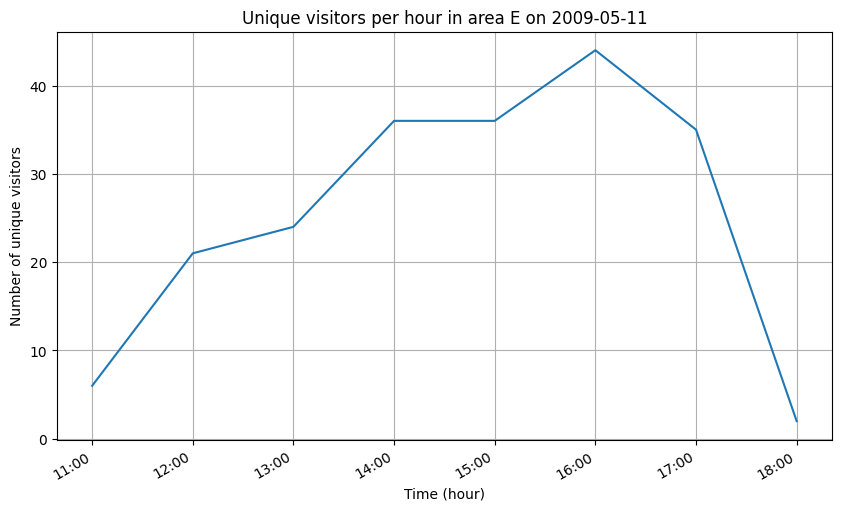

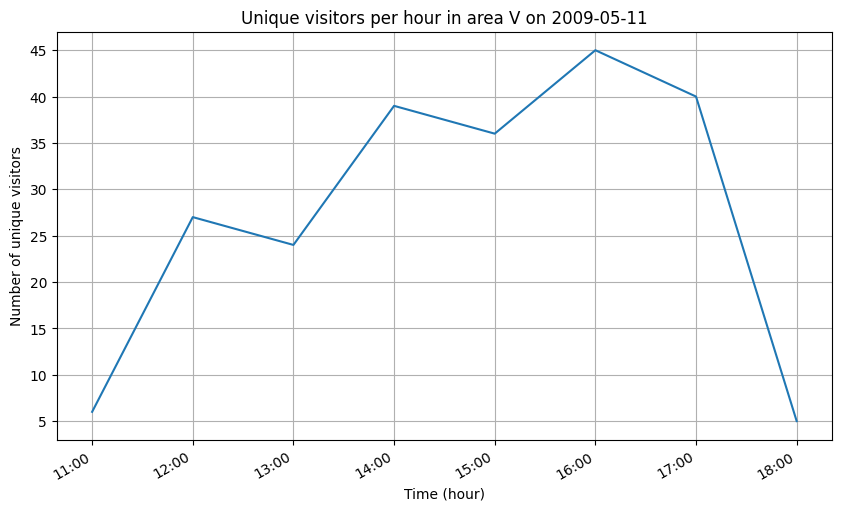

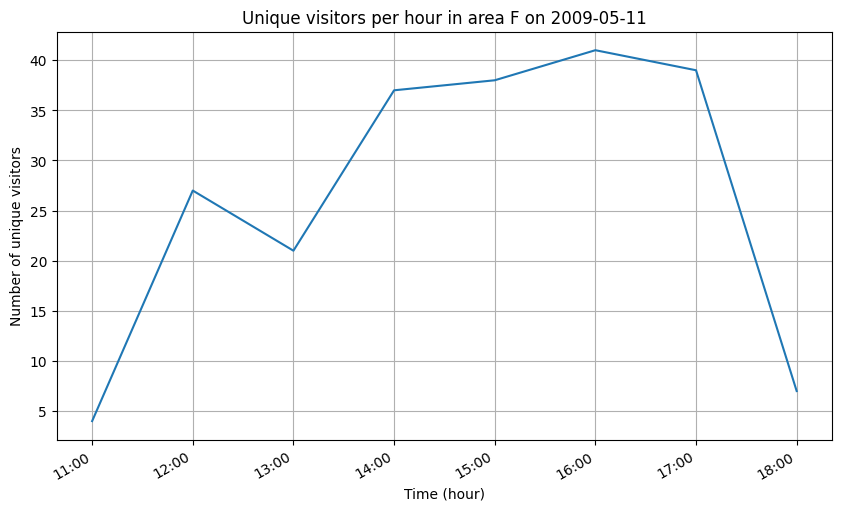

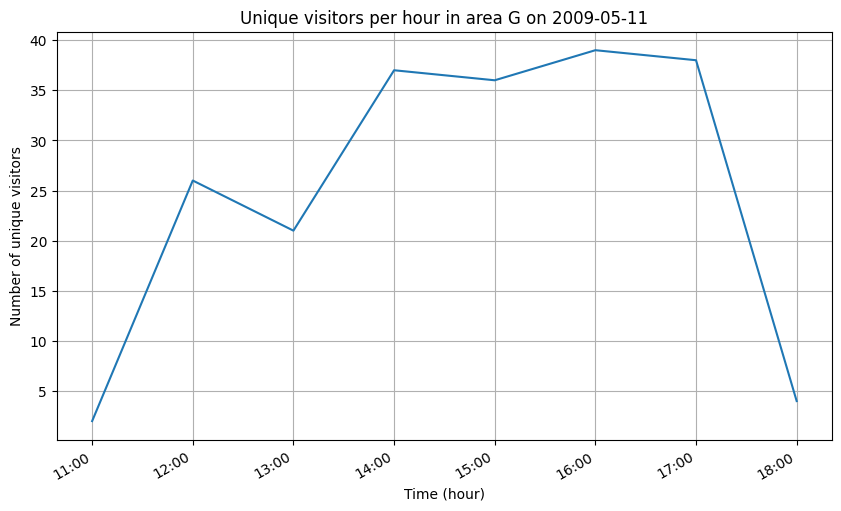

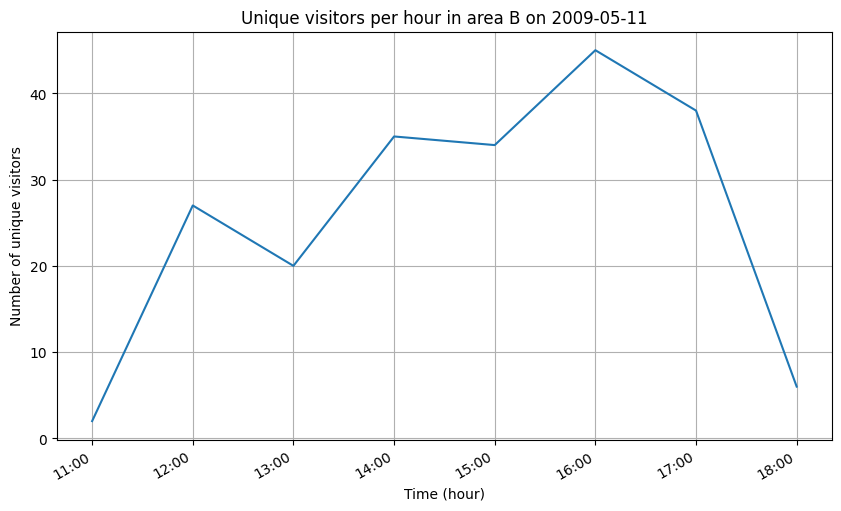

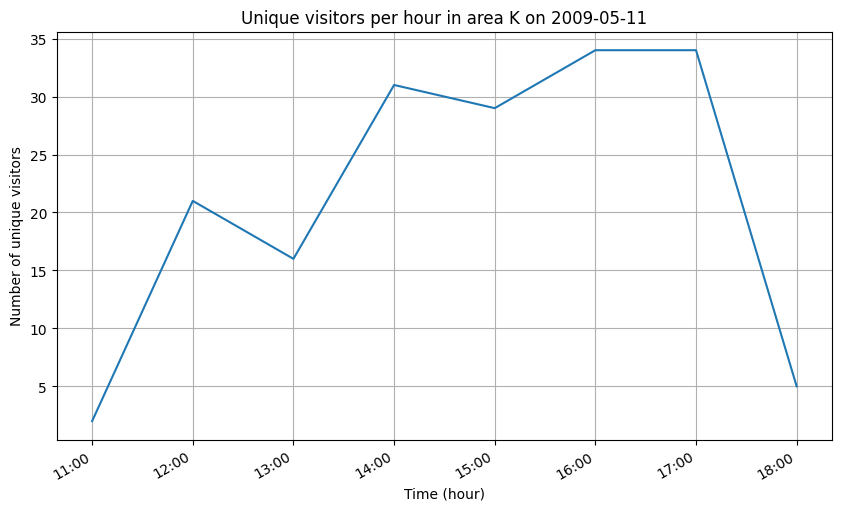

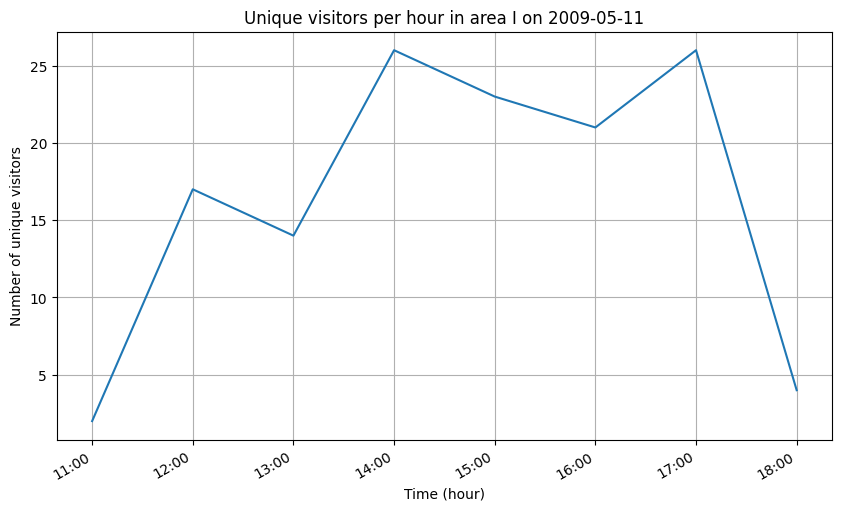

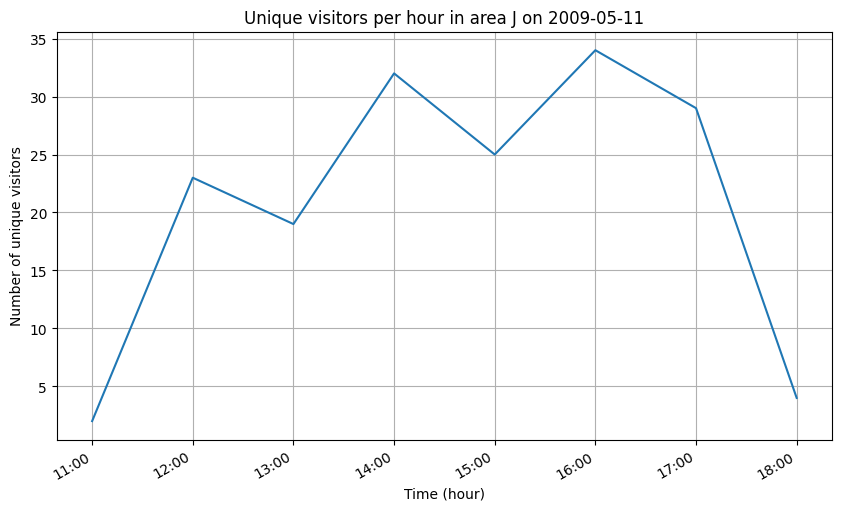

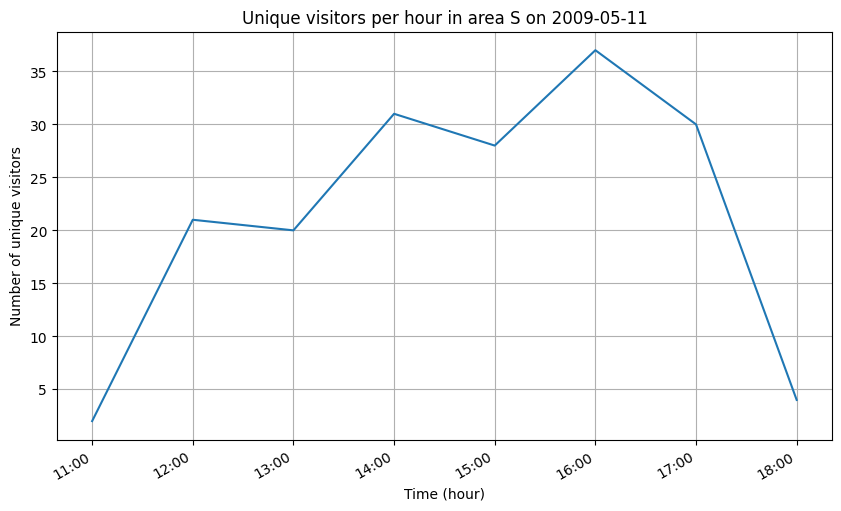

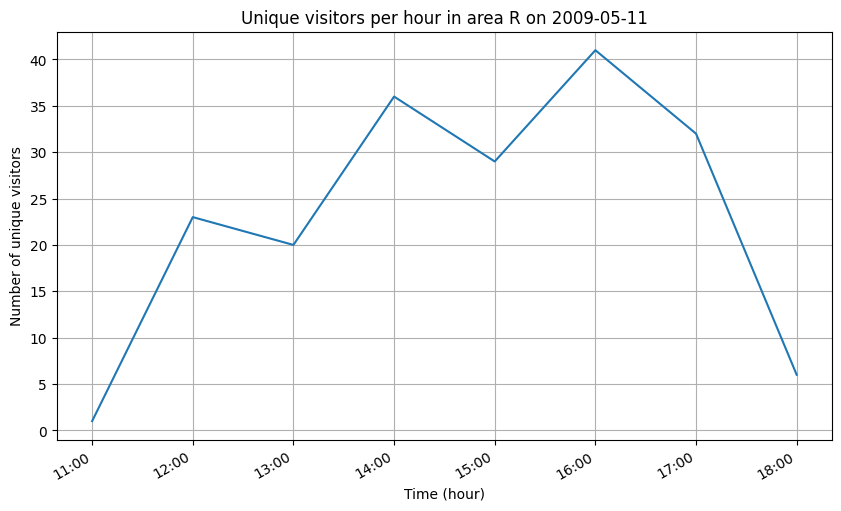

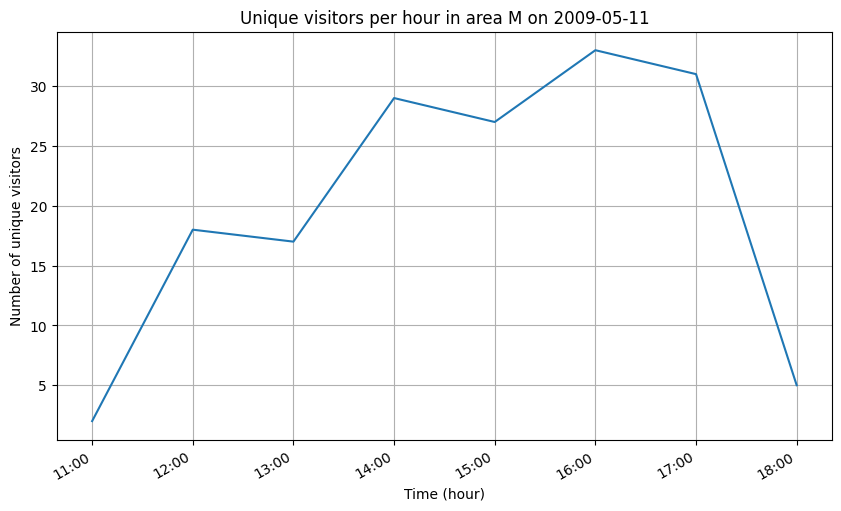

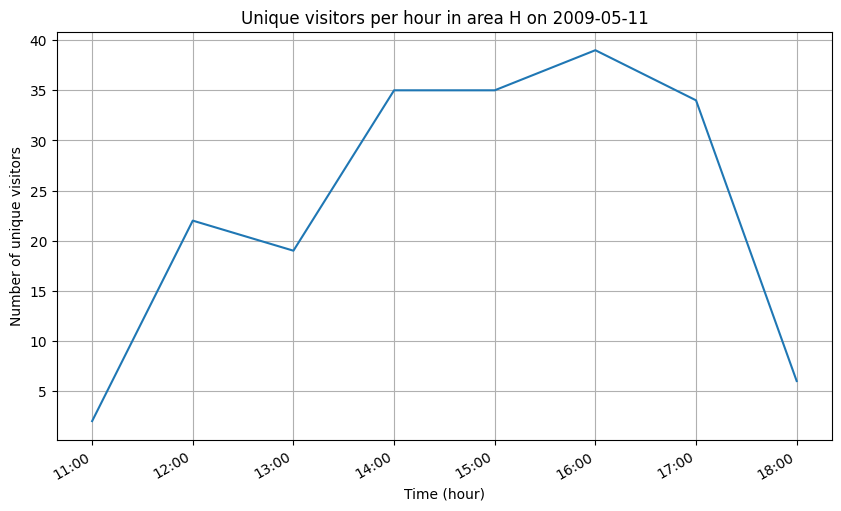

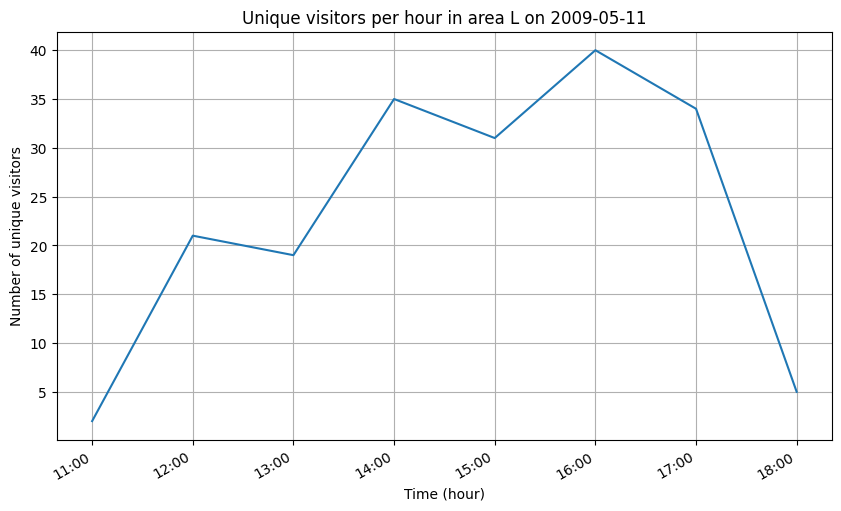

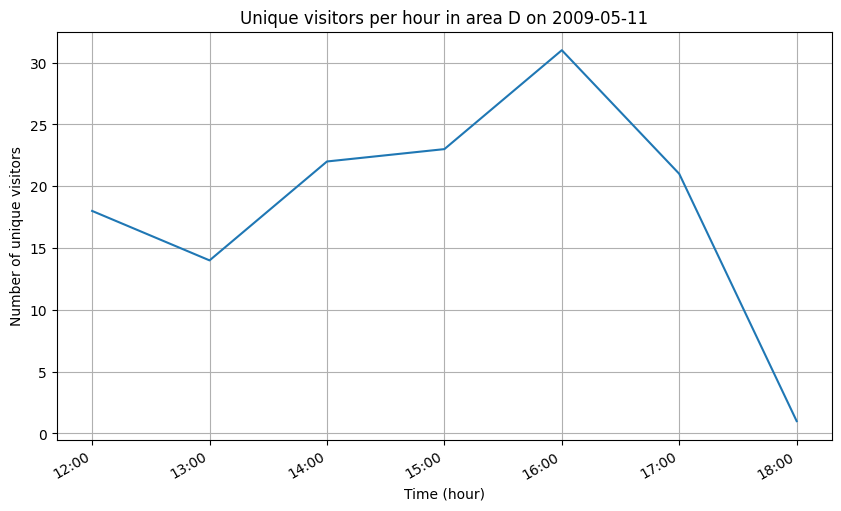

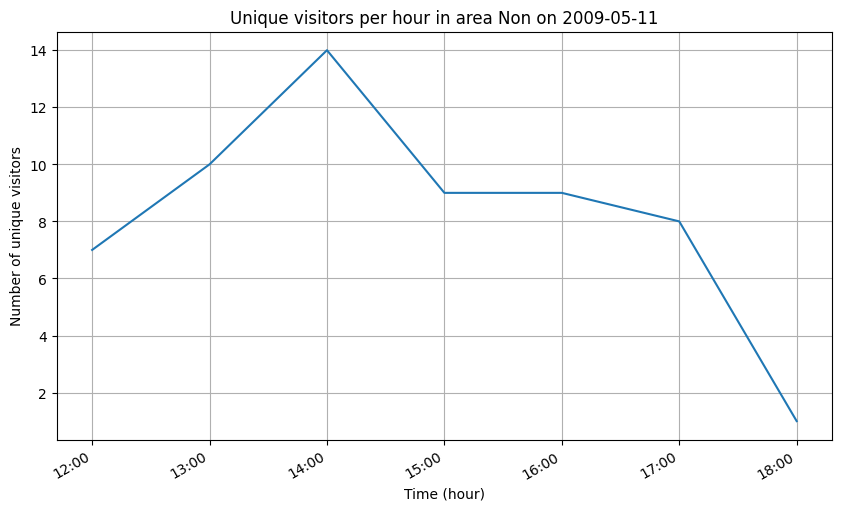

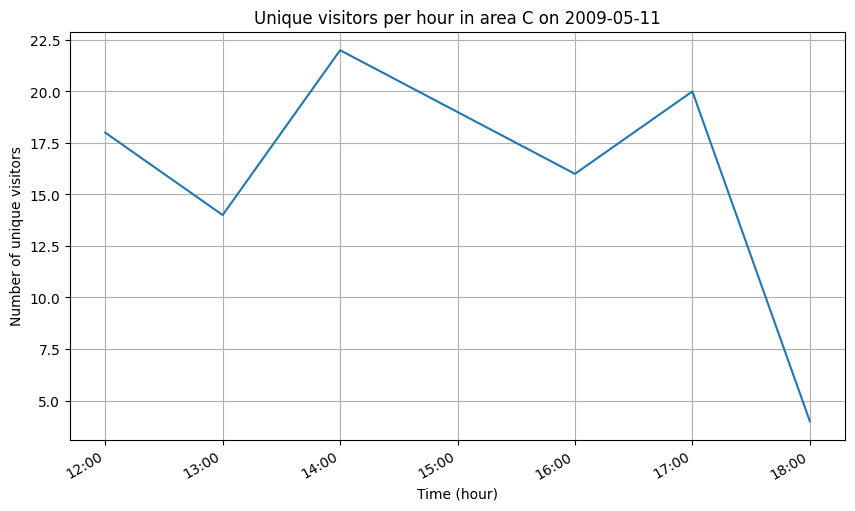

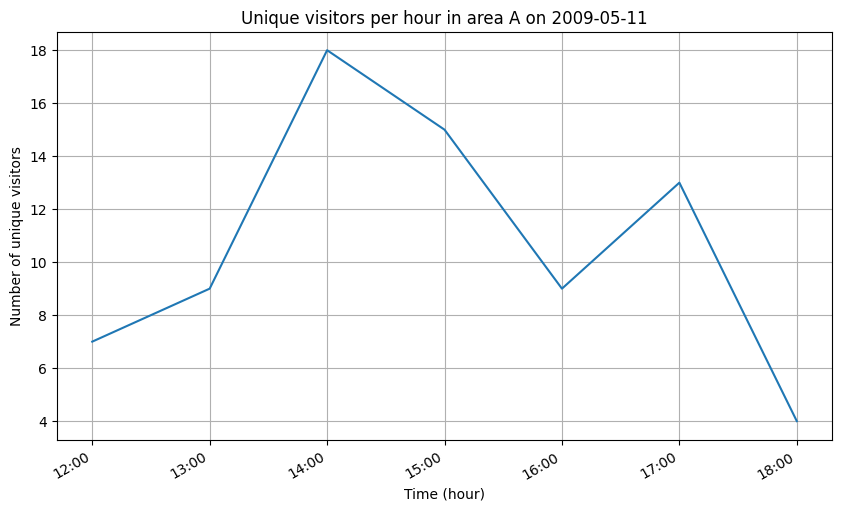

In [22]:
df['datetime'] = pd.to_datetime(df['日付'].astype(str) + df['時刻'].astype(str).str.zfill(6), format='%Y%m%d%H%M%S')

df['hour'] = df['datetime'].dt.floor('h')

selected_date = '2009-05-11'
df_filtered = df[df['datetime'].dt.date == pd.to_datetime(selected_date).date()]

areas = df_filtered['area_E'].unique()
for area in areas:
    area_data = df_filtered[df_filtered['area_E'] == area]
    # Группировка по часу и подсчет уникальных клиентов
    unique_customers_per_hour = area_data.groupby('hour')['customer'].nunique()

    plt.figure(figsize=(10, 6))
    plt.plot(unique_customers_per_hour.index, unique_customers_per_hour.values)

    # Форматирование оси X для отображения времени (часов)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Показывать только часы и минуты
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Делать отметки каждый час
    plt.gcf().autofmt_xdate()  # Автоматически форматировать подписи на оси X

    plt.title(f'Unique visitors per hour in area {area} on {selected_date}')
    plt.xlabel('Time (hour)')
    plt.ylabel('Number of unique visitors')
    plt.grid(True)
    plt.show()